In [66]:
import nicepy as npy
from scipy.constants import golden
from numpy import linalg
%matplotlib inline

In [23]:
training_data = pd.read_csv('regression_train.csv', names=['x', 'y'])
training_data.name = 'training data'
test_data = pd.read_csv('regression_test.csv', names=['x', 'y'])
test_data.name = 'test data'

# Problem 6

## a)

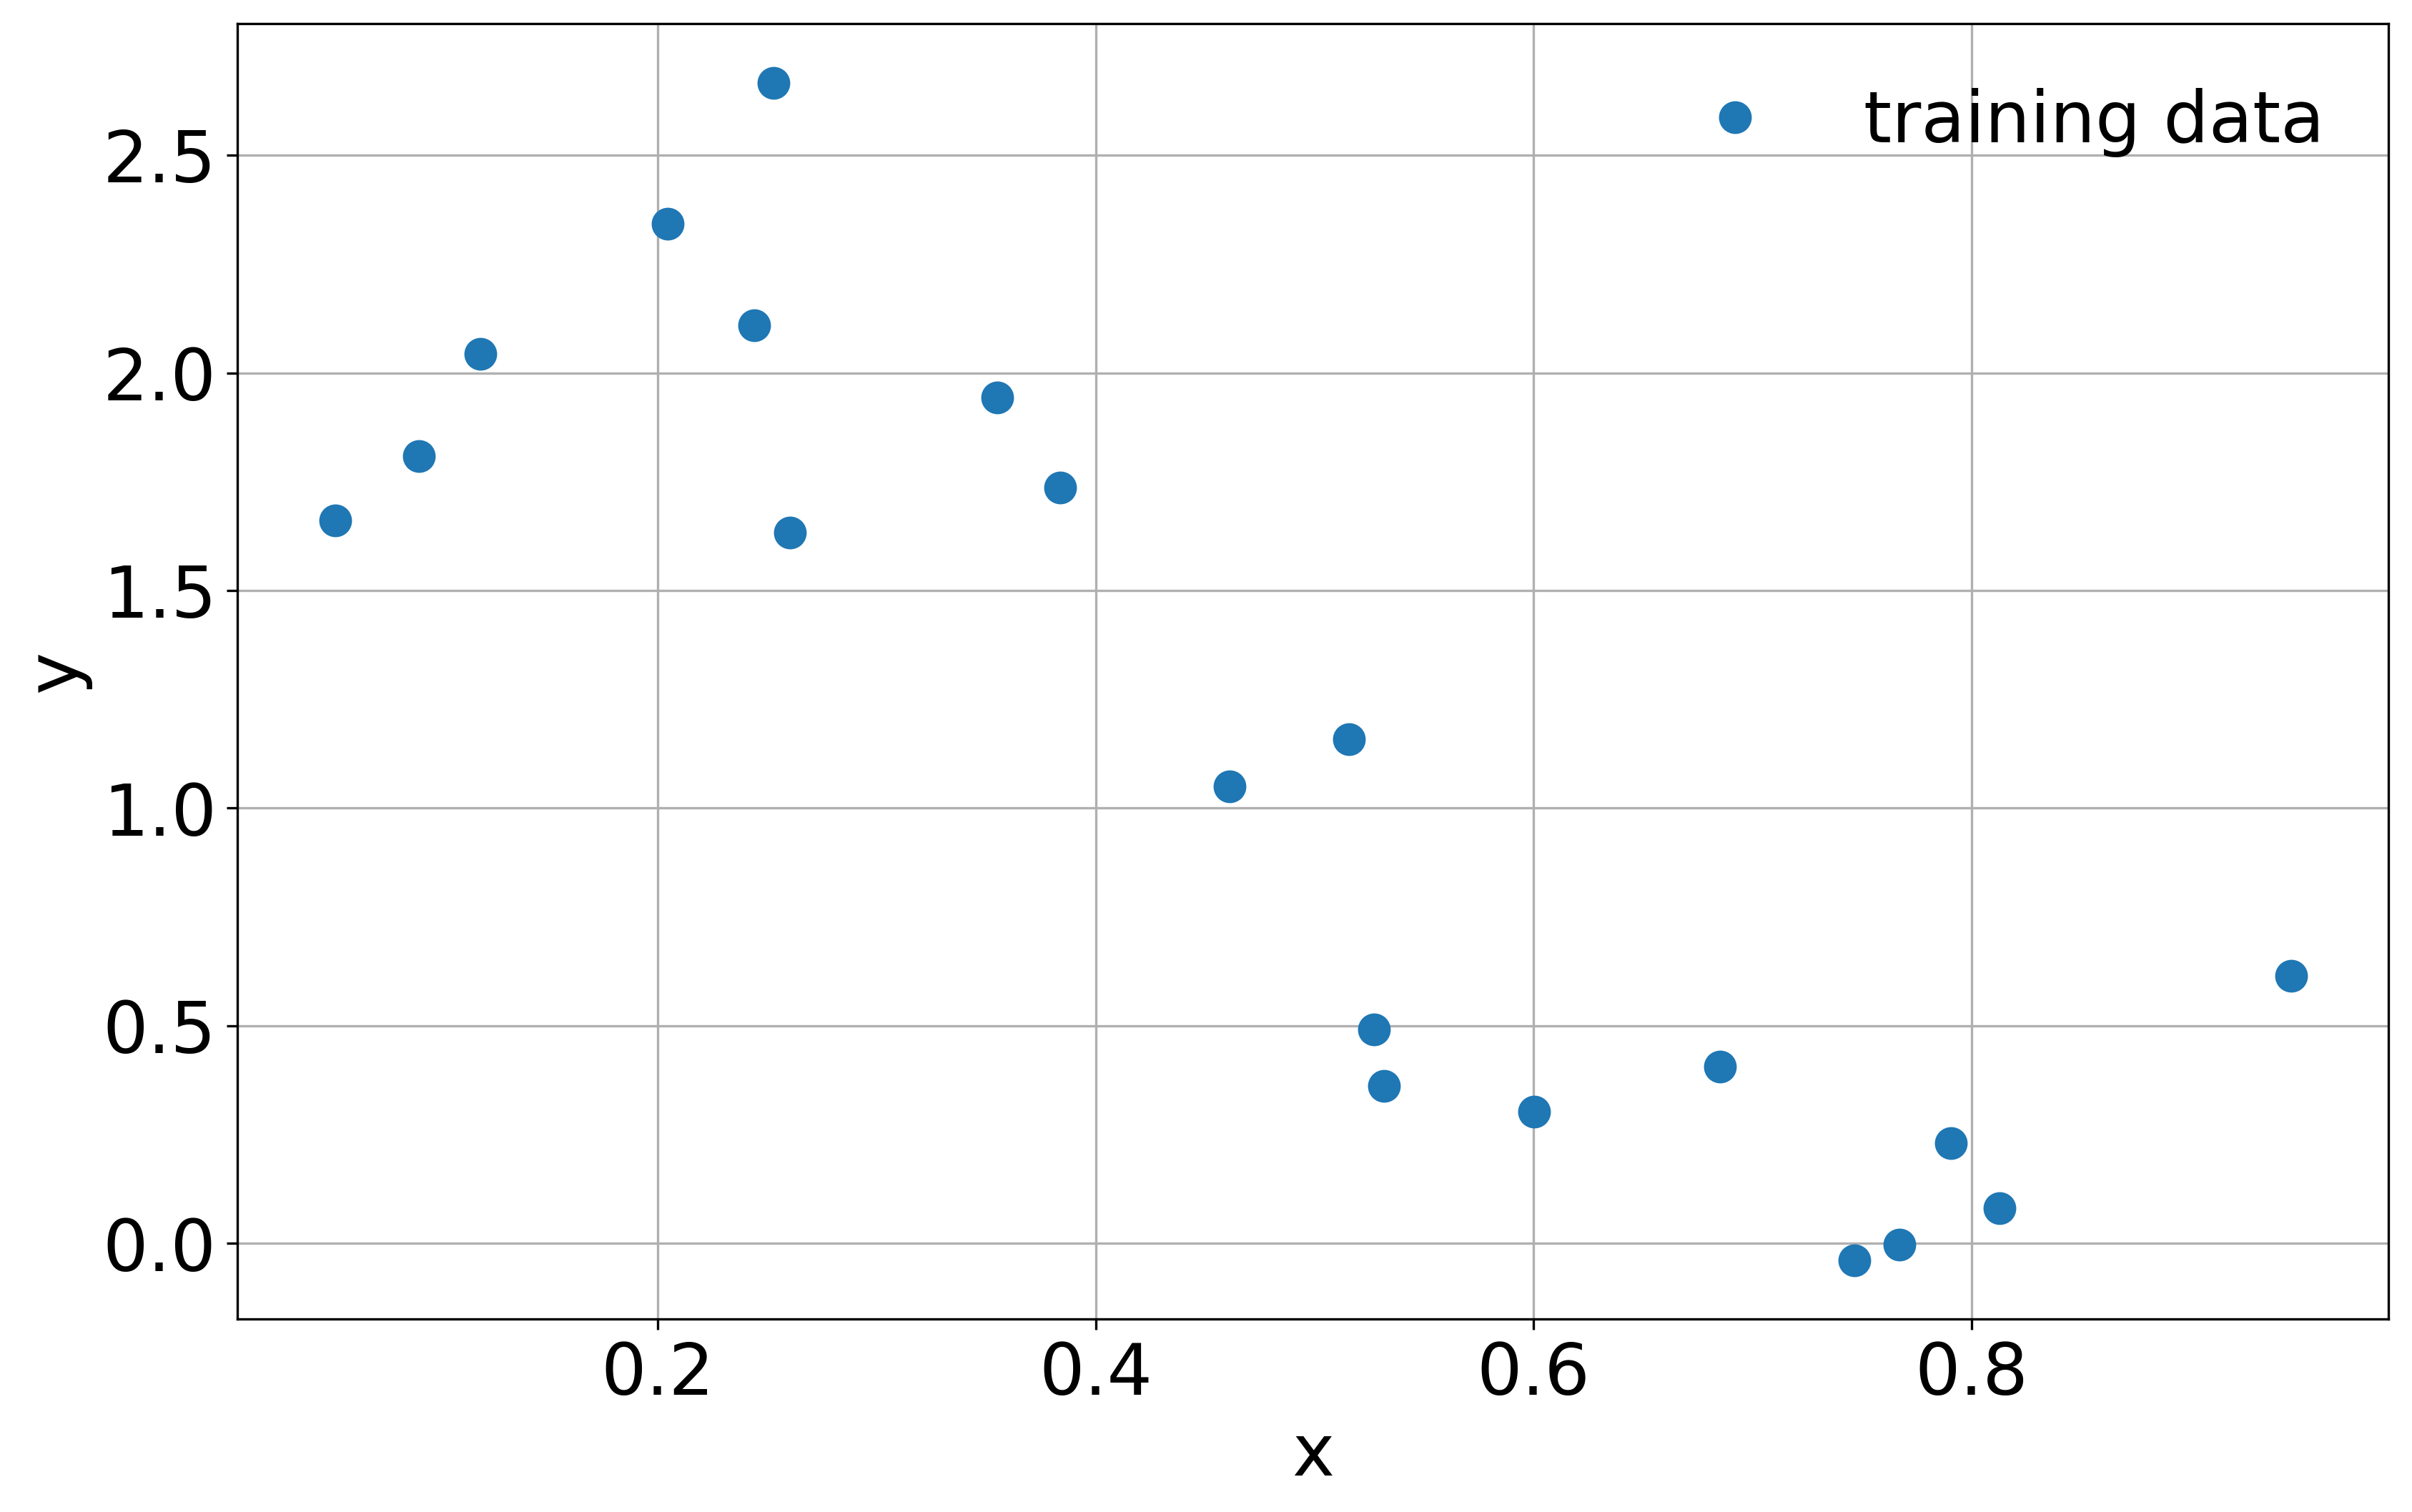

In [43]:
fig, ax = plt.subplots()
training_data.plot.line(x='x', y='y', linestyle='', marker='o', markersize=10, ax=ax, grid=True,
                        label=training_data.name)
ax.set_ylabel('y')
npy.format_fig(fig)
npy.format_ax(ax)
fig.savefig('training_data.png', bbox_inches='tight')

## b)

In [437]:
def closed_form(X, y):
    a = linalg.inv(np.dot(X.transpose(), X))
    b = np.dot(X.transpose(), y)
    
    output = np.dot(a, b)
    
    return output

def j_w(X, y, w):
    a = np.dot(X, w) - y
    
    output = np.sum(np.dot(a, a))
    
    return output

def linear(x, w):
    x = np.array(x)
    
    output = w[0] + w[1]*x
    
    return output

In [438]:
training_data['ones'] = 1
X = training_data[['ones', 'x']]
y = training_data['y']

w = closed_form(X, y)
j = j_w(X, y, w)
print('w = %s' %w)
print('j(w) = %.03e' %j)

w = [ 2.44640709 -2.81635359]
j(w) = 3.913e+00


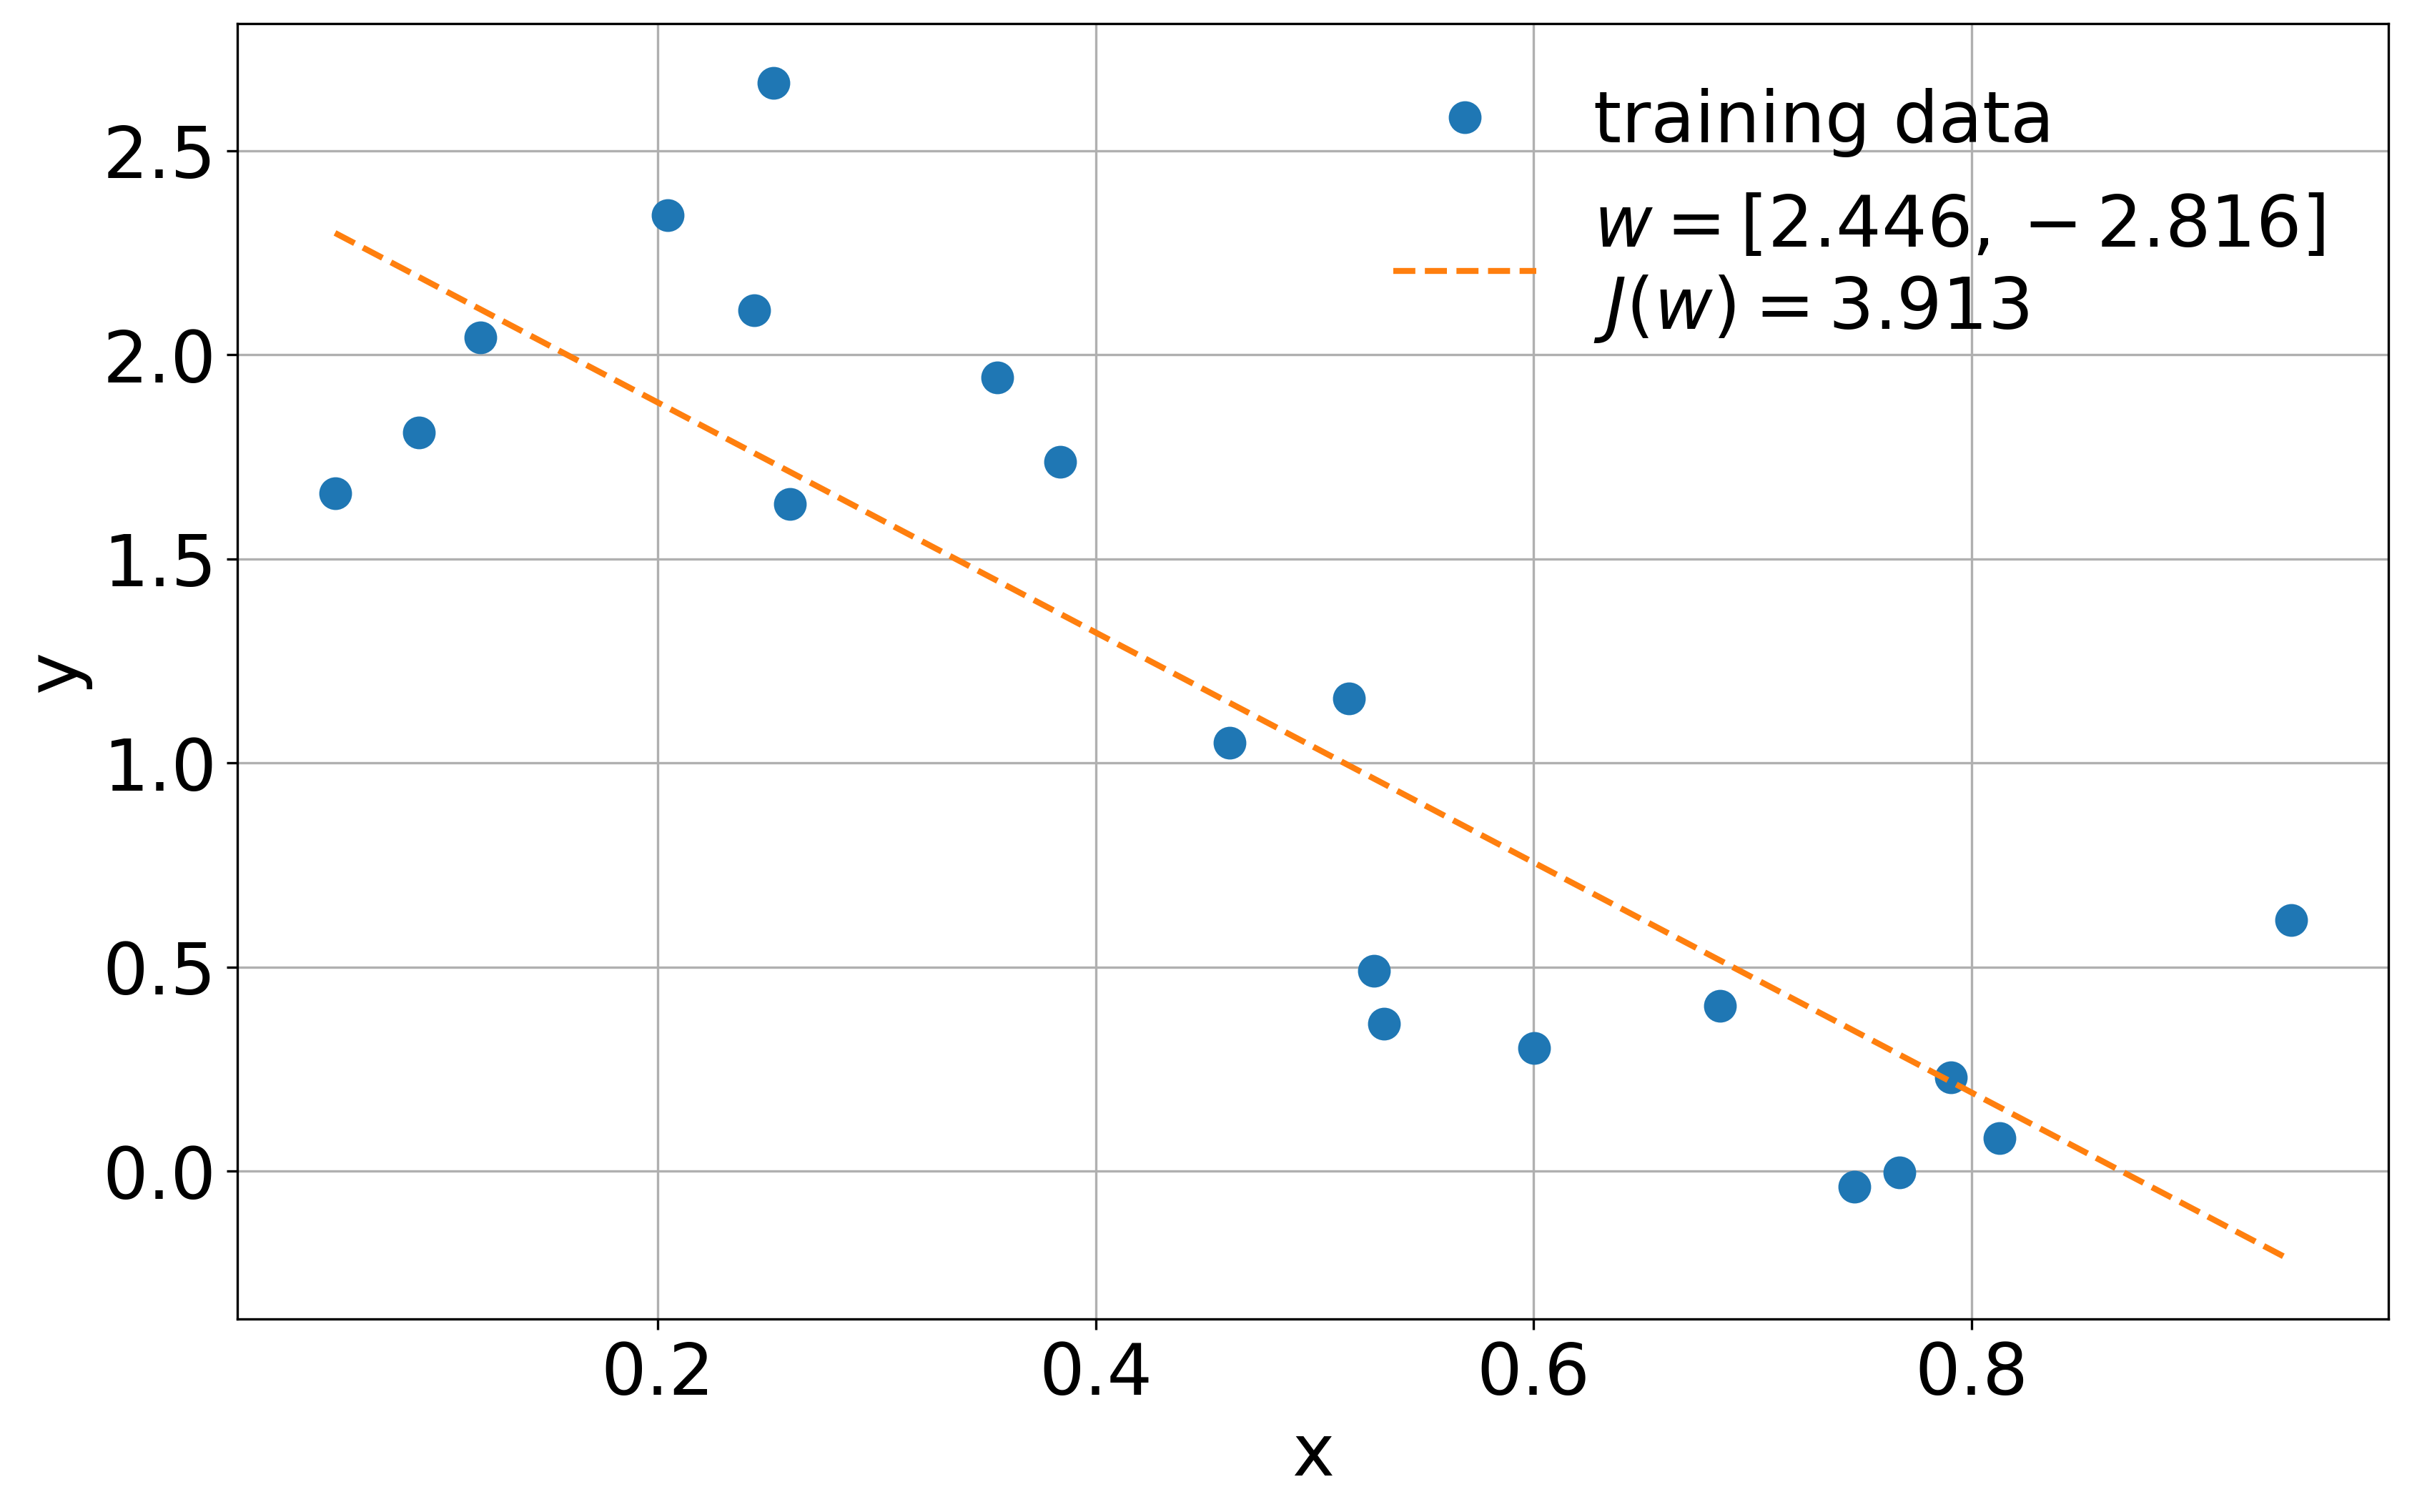

In [439]:
xfit = np.linspace(training_data['x'].min(), training_data['x'].max(), 100)

fig, ax = plt.subplots()
training_data.plot(x='x', y='y', linestyle='', marker='o', markersize=10, ax=ax, grid=True,
                   label=training_data.name)
ax.plot(xfit, linear(xfit, w), linestyle='--', label='$w = [%.03f, %.03f]$\n$J(w) = %.03f$' %(w[0], w[1], j))

ax.set_ylabel('y')
npy.format_fig(fig)
npy.format_ax(ax)

fig.savefig('direct_fit.png', bbox_inches='tight')

## c)
$$ h_w(x) = w^T x = w_0 + w_1x $$
$$ w_j := w_j - \eta \sum_{n=1}^N (h_w(x_n) - y_n)x_{n,j} \text{ (simultaneously update $w_j$ for all $j$)} $$

In [249]:
def h_w(x, w):
    
    output = np.dot(np.transpose(w), x)
    
    return output

def gradient_descent(X, y, eta, itermax=10000):
    X = np.array(X)
    N, d = X.shape
    w = np.zeros(d)
    for i in range(itermax):
        w_diff = np.zeros(d)
        for j in range(d):
            diff = 0
            for n in range(N):
                temp = (h_w(X[n], w) - y[n]) * X[n, j]
                diff += temp
            w_diff[j] = eta * diff
        jw = j_w(X, y, w)
        w -= w_diff
        jw_updated = j_w(X, y, w)
        if abs(jw - jw_updated) < 1e-4:
            break
        else:
            pass
    if itermax == 0:
        i = -1
        jw_updated = j_w(X, y, w)
    else:
        pass
    return i+1, w, jw_updated

In [218]:
for i in range(0):
    print(i)

In [209]:
etas = [0.0407, 0.01, 0.001, 0.0001]

outputs = []
for eta in etas:
    outputs.append(gradient_descent(X, y, eta))

In [210]:
outputs = pd.DataFrame(outputs, index=etas, columns=['iterations', 'w', 'j(w)'])
outputs

,iterations,w,j(w)
0.0407,104,"[2.4329708885140318, -2.789192000816188]",3.913590
0.0100,364,"[2.418242138257251, -2.759417505595016]",3.917030
0.0010,2609,"[2.356682338648857, -2.6349730057357967]",3.957773
0.0001,10000,"[1.9157358465299295, -1.743589894957061]",5.493566


## d)

In [252]:
iterations = [0, 10, 20, 30, 40]
outputs = []
for iteration in iterations:
    output = gradient_descent(X, y, 0.0407, itermax=iteration)
    outputs.append(output)
    
outputs = pd.DataFrame(outputs, columns=['iterations', 'w', 'j(w)'])

In [253]:
outputs

,iterations,w,j(w)
0,0,"[0.0, 0.0]",40.233847
1,10,"[1.4358060998074418, -0.7734012705472096]",9.646306
2,20,"[1.8081832691815507, -1.5261699750677218]",6.199353
3,30,"[2.043350246828314, -2.0015652346823325]",4.824609
4,40,"[2.1918650106857958, -2.301791122802904]",4.276321


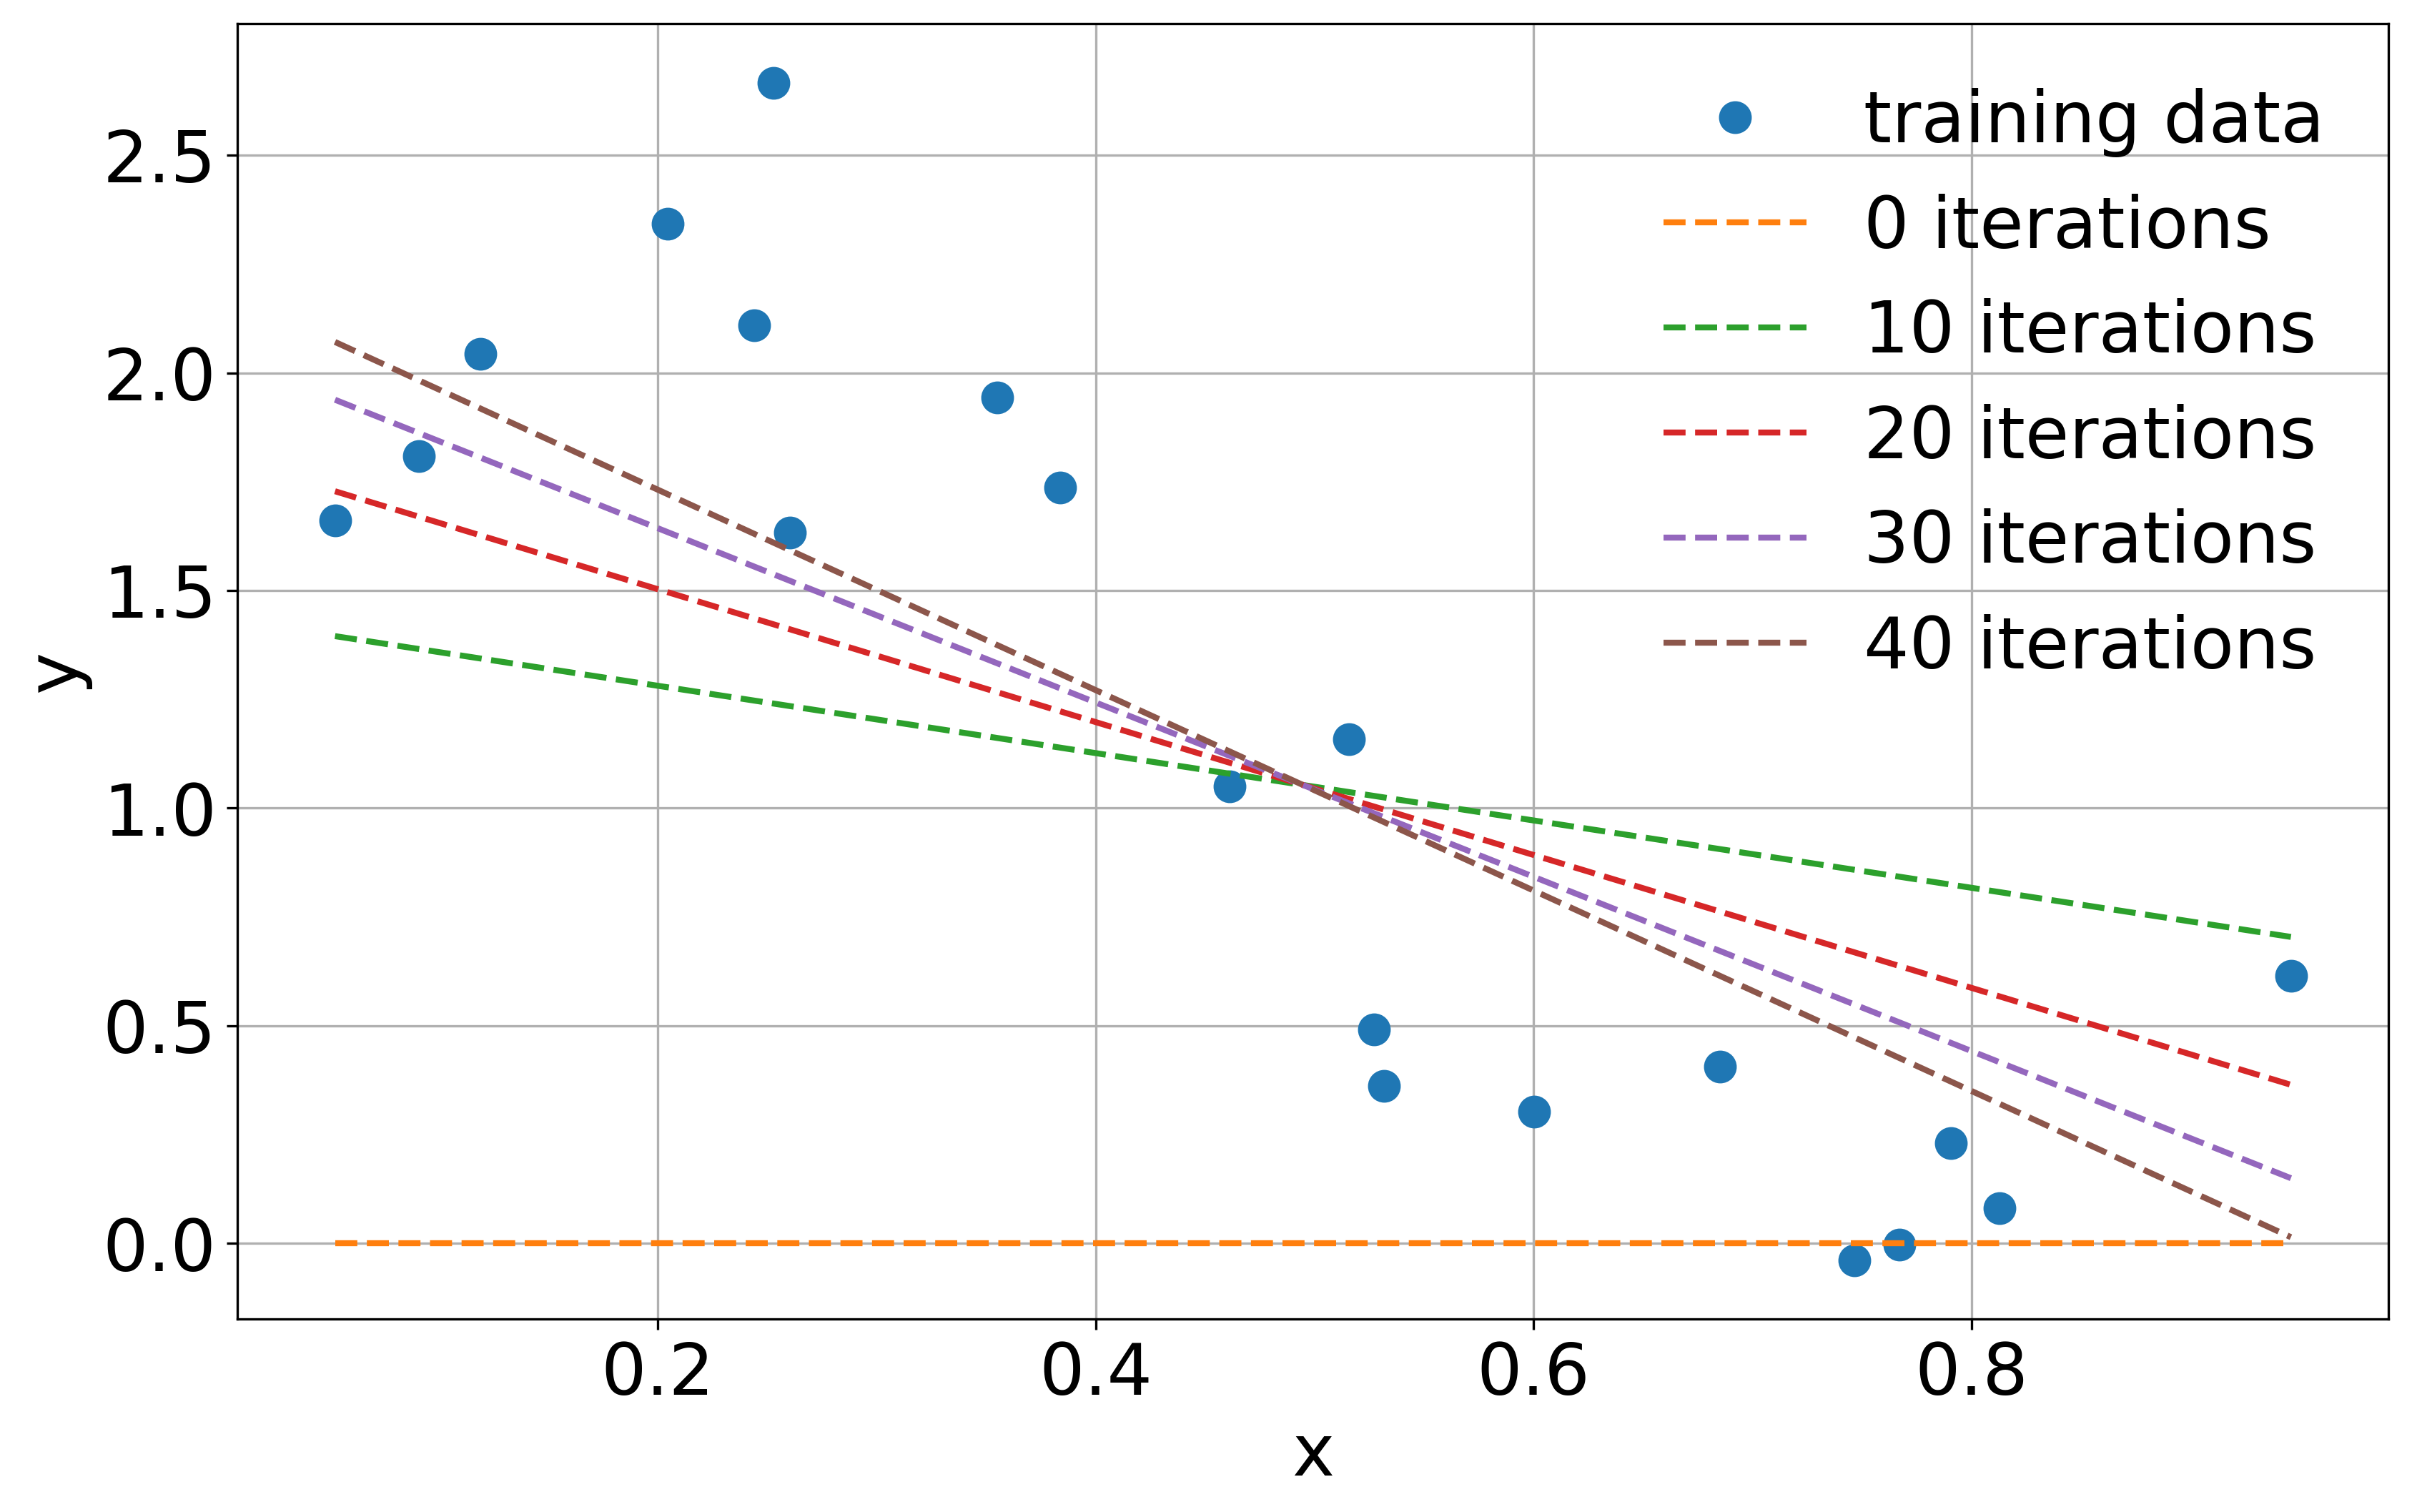

In [266]:
fig, ax = plt.subplots()
training_data.plot.line(x='x', y='y', linestyle='', marker='o', markersize=10, ax=ax, grid=True,
                        label=training_data.name)
xfit = np.linspace(training_data['x'].min(), training_data['x'].max(), 100)
for i, w, j in outputs.values:
    y = linear(xfit, w)
    ax.plot(xfit, y, label='%i iterations' %i, linestyle='--')

ax.set_ylabel('y')
npy.format_fig(fig)
npy.format_ax(ax)

fig.savefig('iterated_GD.png')

## e)

In [428]:
def x_matrix(x, m):
    d = x.shape[0]
    output = np.ones((d, m+1))
    for i in range(m+1):
        output[:,i] = x**i
    return output

def E_RMS(X, y, w):
    N = len(y)
    
    output = np.sqrt(j_w(X, y, w)/N)
    
    return output

In [432]:
training = np.array(training_data.x)
test = np.array(test_data.x)
y_training = training_data.y
y_test = test_data.y
m = 10
E_training = []
E_test = []
for i in range(m+1):
    x_training = x_matrix(training, i)
    x_test = x_matrix(test, i)
    w = closed_form(x_training, y_training)
    E_training.append(E_RMS(x_training, y_training, w))
    E_test.append(E_RMS(x_test, y_test, w))

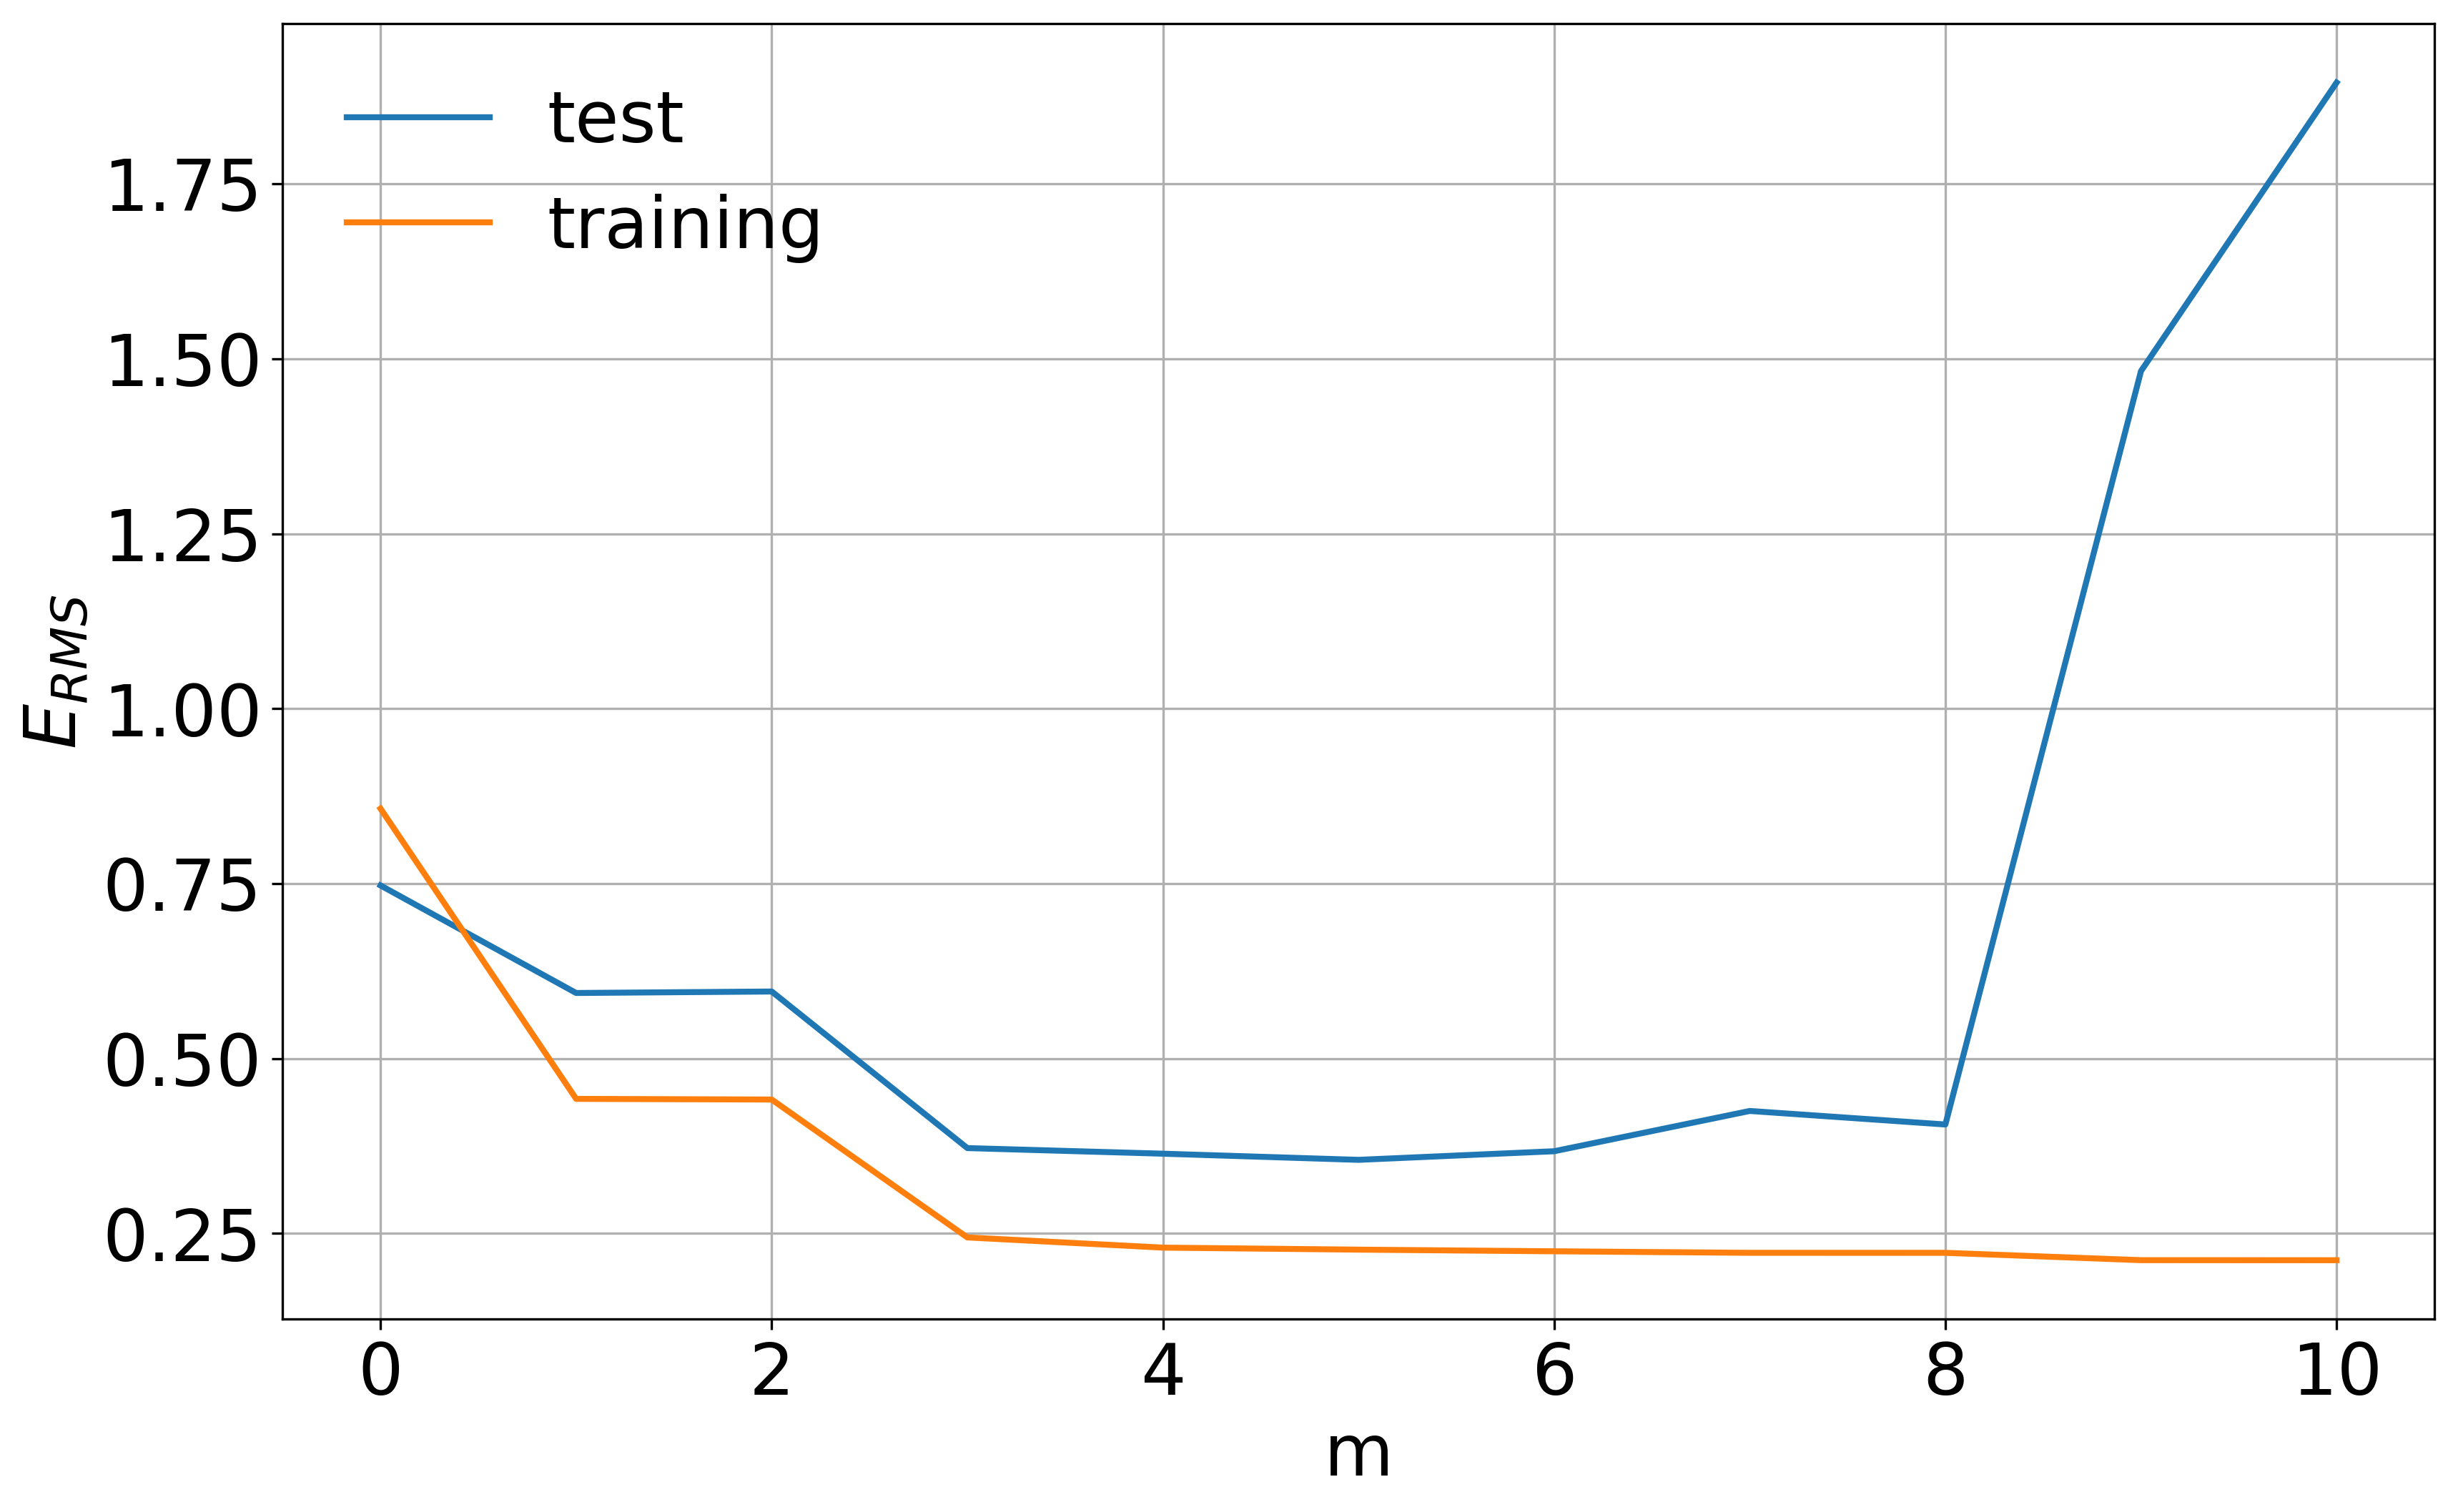

In [436]:
fig, ax = plt.subplots()
m = range(11)
ax.plot(m, E_test, label='test')
ax.plot(m, E_training, label='training')

ax.grid()
ax.set_ylabel('$E_{RMS}$')
ax.set_xlabel('m')
npy.format_fig(fig)
npy.format_ax(ax)
fig.savefig('E_RMS.png', bbox_inches='tight')